#Business Case Study

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [ ]:
walmart_df = pd.read_csv('walmart_data.txt')

In [ ]:
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# B. You can find the number of rows and columns given in the dataset

In [ ]:
print(f"The data set contains {walmart_df.shape[0]} rows and {walmart_df.shape[1]} columns in the given walmart data")

The data set contains 550068 rows and 10 columns in the given walmart data


#A. The data type of all columns in the “customers” table.


In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#C. Check for the missing values and find the number of missing values in each column

In [ ]:
walmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Conclusion: There is no missing data in the given data set

#2. Detect Null values and outliers

#a. Find the outliers for every continuous variable in the dataset

<Axes: xlabel='Purchase'>

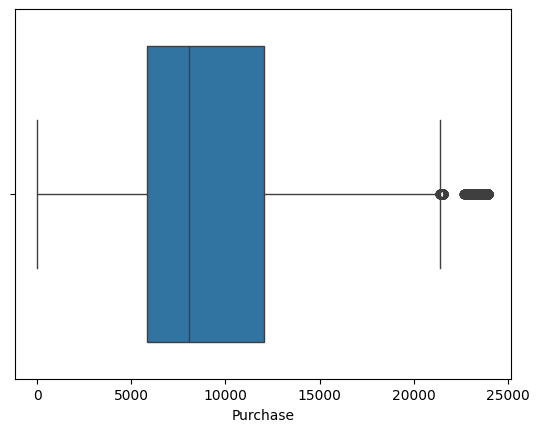

In [ ]:
# Create a boxplot for each continuous variable
sns.boxplot(x=walmart_df['Purchase'])

In [ ]:
Q3 = np.percentile(walmart_df['Purchase'], 75)
Q1 = np.percentile(walmart_df['Purchase'], 25)
print("Q3: ", Q3)
print("Q1: ", Q1)
IQR_Purchase = Q3 - Q1
print("IQR_Purchase:", IQR_Purchase)

Q3:  12054.0
Q1:  5823.0
IQR_Purchase: 6231.0


In [ ]:
upper = Q3 + 1.5 * IQR_Purchase
print("upper:", upper)
x = (walmart_df["Purchase"] > upper).sum()
print("No of outliers in the purchase column:",x)
print("Percentage of outliers", round((x/walmart_df.shape[0])*100,2))

upper: 21400.5
No of outliers in the purchase column: 2677
Percentage of outliers 0.49


Observation

*   Purchase columns contain some outliers
*   No other columns have outliers.



#b. Remove/clip the data between the 5 percentile and 95 percentile

In [ ]:
#Before Clipping Minimum value
walmart_df["Purchase"].min()

12

In [ ]:
#Before Clipping Maximum value
walmart_df["Purchase"].max()

23961

In [ ]:
df = walmart_df
lower = df["Purchase"].quantile(0.05)
upper = df["Purchase"].quantile(0.95)
df["Purchase"] = df["Purchase"].clip(lower, upper)

In [ ]:
#After Clipping Minimum value
df["Purchase"].min()

1984

In [ ]:
#Before Clipping Maximum value
df["Purchase"].max()

19336

#3. Data Exploration


#a. What products are different age groups buying?

In [ ]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


     Age  User_ID
0   0-17      218
1  18-25     1069
2  26-35     2053
3  36-45     1167
4  46-50      531
5  51-55      481
6    55+      372


<Axes: xlabel='Age'>

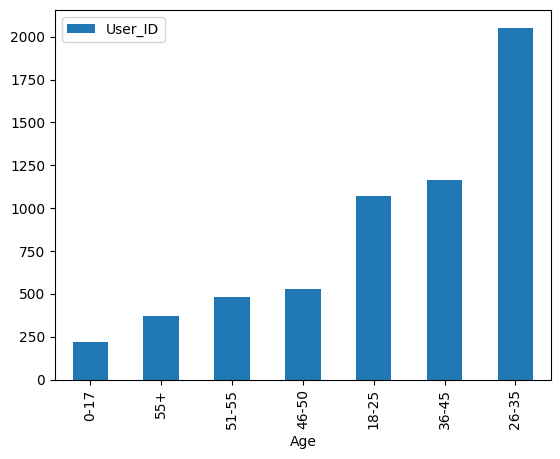

In [ ]:
age_data = walmart_df.groupby(['Age'])['User_ID'].nunique().reset_index()
print(age_data)
age_data.sort_values(by = "User_ID", ascending = True).plot(kind='bar',x = 'Age', y = 'User_ID')

#b. Is there a relationship between age, marital status, and the amount spent?

<Axes: xlabel='Age'>

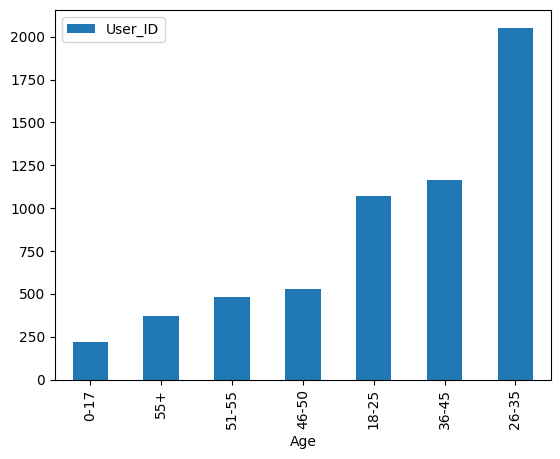

In [ ]:
age_data = walmart_df.groupby('Age')['User_ID'].nunique().reset_index()
age_data.sort_values(by = "User_ID", ascending = True).plot(kind='bar',x = 'Age', y = 'User_ID')

#c. Are there preferred product categories for different genders?

In [ ]:
walmart_gender_product_category = walmart_df.groupby(['Gender','Product_Category'])['User_ID'].nunique().reset_index()
walmart_gender_product_category

,Gender,Product_Category,User_ID
0,F,1,1593
1,F,2,1146
2,F,3,1093
3,F,4,966
4,F,5,1638
5,F,6,1090
6,F,7,351
7,F,8,1614
8,F,9,70
9,F,10,513


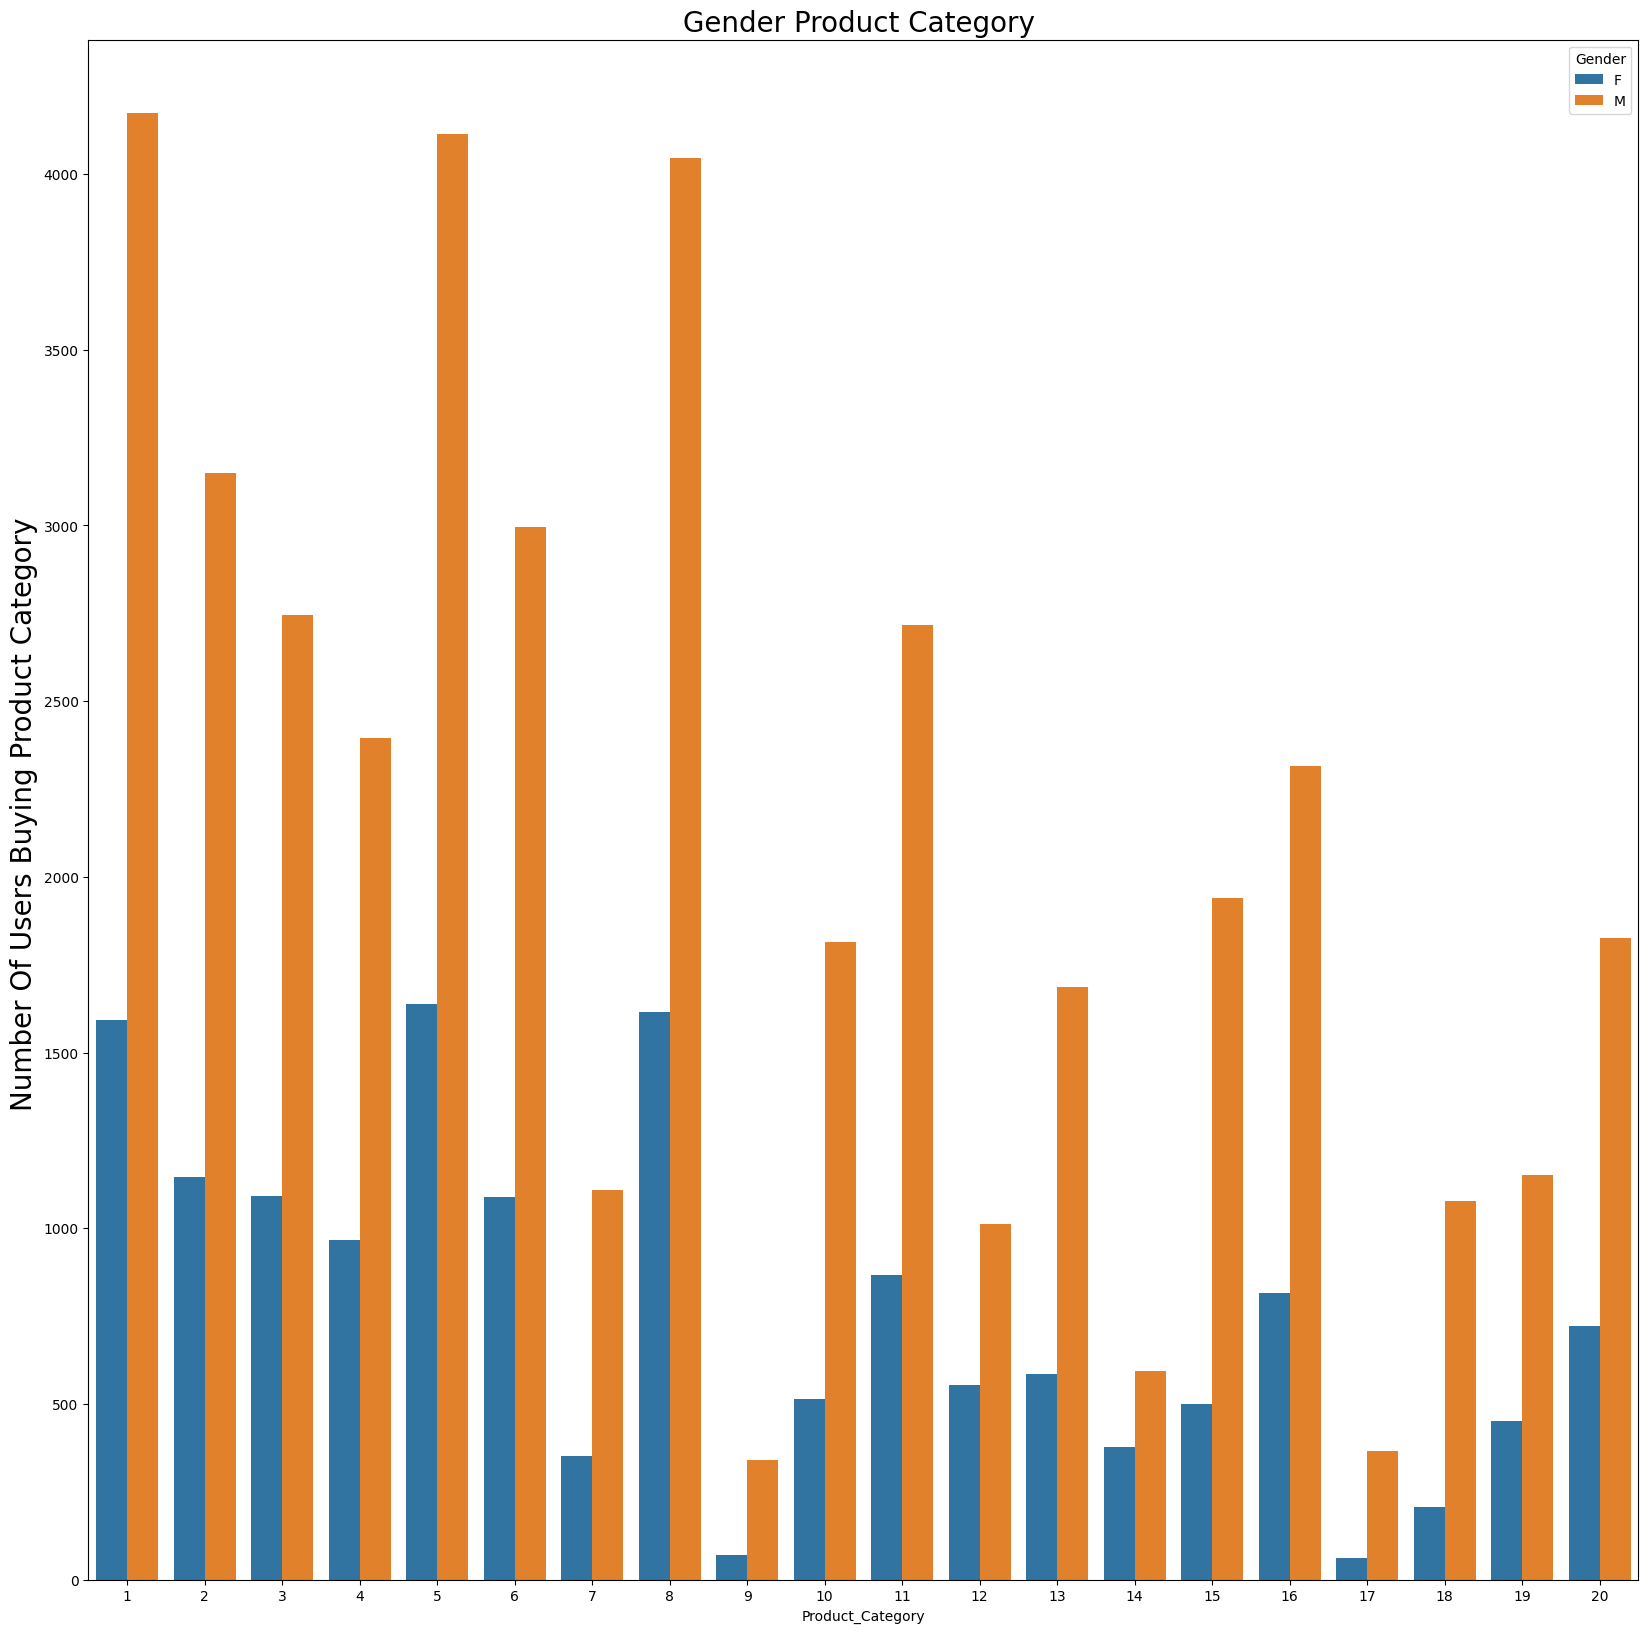

In [ ]:
fig = plt.figure(figsize=(20,20))
sns.barplot(data=walmart_gender_product_category, x='Product_Category', y='User_ID', hue='Gender')
plt.ylabel('Number Of Users Buying Product Category ',fontsize=20)
plt.title("Gender Product Category ",fontsize=20)
plt.show()

#4. How does gender affect the amount spent?

In [ ]:
walmart_female = walmart_df[walmart_df['Gender']=='F']
female_all = np.array(walmart_female['Purchase']).flatten()
walmart_male = walmart_df[walmart_df['Gender']=='M']
male_all = np.array(walmart_male['Purchase']).flatten()
overall = np.array(walmart_df['Purchase']).flatten()

In [ ]:
male_mean = round(np.mean(male_all),2)
male_std = round(np.std(male_all),2)
male_median = round(np.median(male_all),2)
male_var=round(np.var(male_all),2)
female_mean = round(np.mean(female_all),2)
female_std = round(np.std(female_all),2)
female_median = round(np.median(female_all),2)
female_var=round(np.var(female_all),2)
overall_mean = round(np.mean(overall),2)
overall_std = round(np.std(overall),2)
overall_median = round(np.median(overall),2)
overall_var=round(np.var(overall),2)

gender_analysis_df=pd.DataFrame([[male_mean, male_median, male_std, male_var,'male'],
              [female_mean, female_median, female_std, female_var,'female'],
            [overall_mean, overall_median, overall_std, overall_var,'overall']
                                ], columns=['mean','median','standard deviation','variance','hue'])
gender_analysis_df.head()

,mean,median,standard deviation,variance,hue
0,9427.24,8098.0,4925.95,24264959.23,male
1,8736.54,7914.0,4596.97,21132111.93,female
2,9256.71,8047.0,4855.94,23580180.01,overall


In [ ]:
def Central_Limit_Theorem_Plot(sample_size, num_iterations,female_all, male_all):
  fig = plt.figure(figsize=(10,10))

  overall_sample = []
  for i in range(num_iterations):
    overall_samples = np.random.choice(overall,sample_size )
    overall_sample.append(np.mean(overall_samples))
  sns.kdeplot(data=overall_sample,label='overall [Male and Female combined]',fill=True)

  bootstraped_female=[]
  for i in range(num_iterations):
      female_samples = np.random.choice(female_all,sample_size )
      bootstraped_female.append(np.mean(female_samples))
  sns.kdeplot(data=bootstraped_female,label='Female',fill=True)

  bootstraped_male=[]
  for i in range(num_iterations):
      male_samples = np.random.choice(male_all,sample_size )
      bootstraped_male.append(np.mean(male_samples))
  sns.kdeplot(data=bootstraped_male,label='Male',fill=True)

#Finding C.I at 90,95,99 for male, female and overall data

  male_90 = np.percentile(bootstraped_male, q=[5,95]).round(2)
  male_95 = np.percentile(bootstraped_male, q=[2.5,97.5]).round(2)
  male_99 = np.percentile(bootstraped_male, q=[0.05,99.5]).round(2)
  female_90 = np.percentile(bootstraped_female, q=[5,95]).round(2)
  female_95 = np.percentile(bootstraped_female, q=[2.5,97.5]).round(2)
  female_99 = np.percentile(bootstraped_female, q=[0.05,99.5]).round(2)
  overall_90 = np.percentile(overall_sample, q=[5,95]).round(2)
  overall_95 = np.percentile(overall_sample, q=[2.5,97.5]).round(2)
  overall_99 = np.percentile(overall_sample, q=[0.05,99.5]).round(2)
  male_std_err = round(male_std/((len(bootstraped_male)**0.5)),2)
  female_std_err = round(female_std/((len(bootstraped_female)**0.5)),2)
  oveall_std_err = round(overall_std/((len(overall_sample)**0.5)),2)


  plt.legend()
  plt.xlabel("Purchase Amount")
  plt.title(f"Gender Purchase {sample_size}")

  array = [
      ['Male','90%',male_90[0],male_90[1],male_90[1]-male_90[0],(male_90[1]-male_90[0])/(2*1.645), sample_size,num_iterations ],
      ['Female','90%',female_90[0],female_90[1],female_90[1]-female_90[0],(female_90[1]-female_90[0])/(2*1.645), sample_size,num_iterations],
      ['Overall','90%',overall_90[0],overall_90[1],overall_90[1]-overall_90[0],(overall_90[1]-overall_90[0])/(2*1.645),sample_size,num_iterations],
      ['Male','95%',male_95[0],male_95[1],male_95[1]-male_95[0],(male_95[1]-male_95[0])/(2*1.96),sample_size,num_iterations],
      ['Female','95%',female_95[0],female_95[1],female_95[1]-female_95[0],(female_95[1]-female_95[0])/(2*1.96),sample_size,num_iterations],
      ['Overall','95%',overall_95[0],overall_95[1],overall_95[1]-overall_95[0],(overall_95[1]-overall_95[0])/(2*1.96),sample_size,num_iterations],
      ['Male','99%',male_99[0],male_99[1],male_99[1]-male_99[0],(male_99[1]-male_99[0])/(2*2.575),sample_size,num_iterations],
      ['Female','99%',female_99[0],female_99[1],female_99[1]-female_99[0],(female_99[1]-female_99[0])/(2*2.575),sample_size,num_iterations],
      ['Overall','99%',overall_99[0],overall_99[1],overall_99[1]-overall_99[0],(overall_99[1]-overall_99[0])/(2*2.575),sample_size,num_iterations]
    ]

  df = pd.DataFrame(data=array,
    columns=['Gender','C.I Limit','Lower Limit','Upper Limit',
      'diff','std_error','sample_size','iterations'])

  plt.show()

  return df


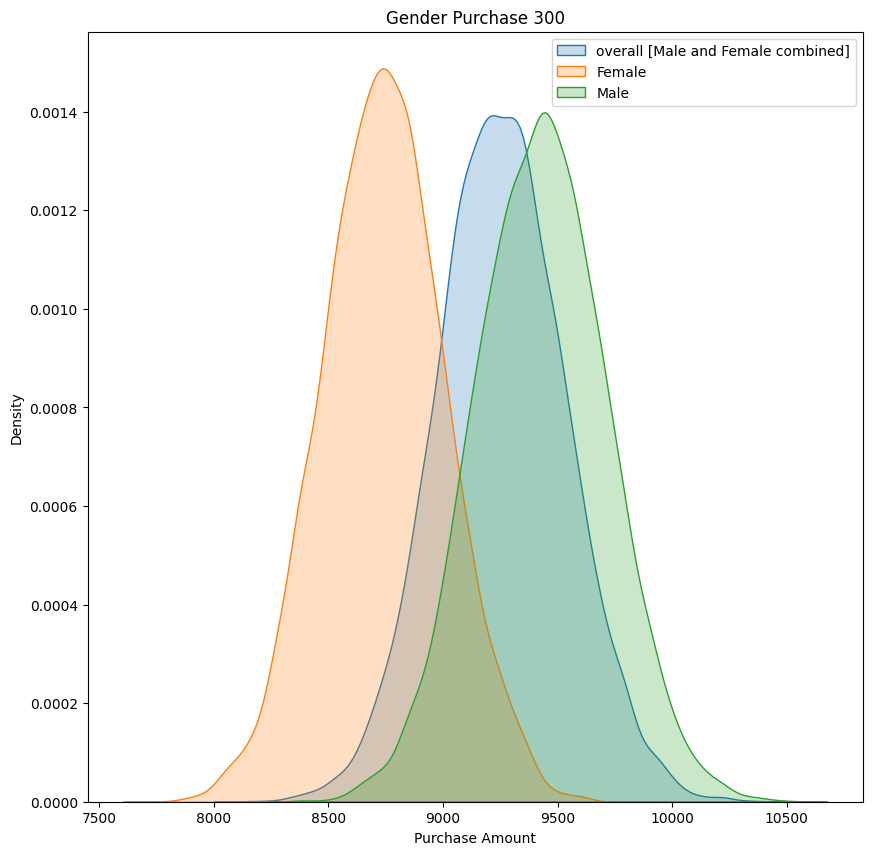

In [ ]:
df_gender_300 = Central_Limit_Theorem_Plot(300, 10000,female_all, male_all)

In [ ]:
df_gender_300.head(10)

,Gender,C.I Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,iterations
0,Male,90%,8970.80,9897.73,926.93,281.741641,300,10000
1,Female,90%,8303.59,9182.73,879.14,267.215805,300,10000
2,Overall,90%,8803.56,9720.90,917.34,278.826748,300,10000
3,Male,95%,8876.37,9986.14,1109.77,283.104592,300,10000
4,Female,95%,8228.55,9269.71,1041.16,265.602041,300,10000
5,Overall,95%,8714.21,9809.02,1094.81,279.288265,300,10000
6,Male,99%,8530.09,10178.83,1648.74,320.143689,300,10000
7,Female,99%,7900.22,9408.15,1507.93,292.801942,300,10000
8,Overall,99%,8333.77,9987.93,1654.16,321.196117,300,10000


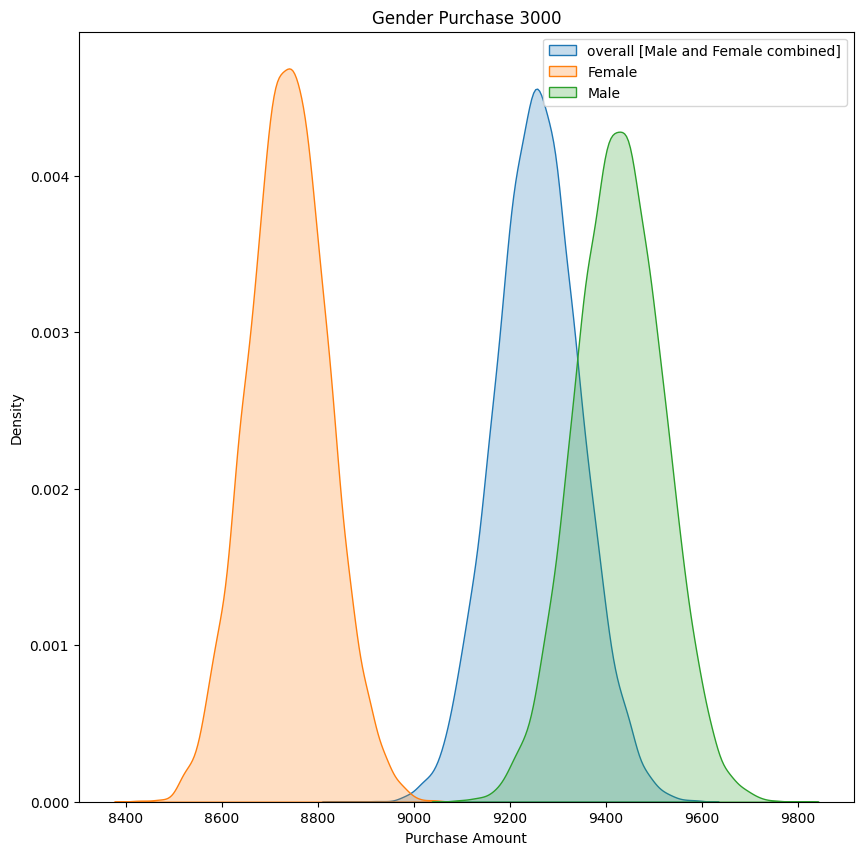

In [ ]:
df_gender_3000 = Central_Limit_Theorem_Plot(3000, 10000,female_all, male_all)

In [ ]:
df_gender_3000.head(10)

,Gender,C.I Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,iterations
0,Male,90%,9278.18,9576.98,298.80,90.820669,3000,10000
1,Female,90%,8598.96,8875.31,276.35,83.996960,3000,10000
2,Overall,90%,9112.66,9403.36,290.70,88.358663,3000,10000
3,Male,95%,9249.56,9603.59,354.03,90.313776,3000,10000
4,Female,95%,8575.59,8904.52,328.93,83.910714,3000,10000
5,Overall,95%,9087.40,9435.58,348.18,88.821429,3000,10000
6,Male,99%,9125.89,9661.62,535.73,104.025243,3000,10000
7,Female,99%,8472.78,8954.71,481.93,93.578641,3000,10000
8,Overall,99%,8976.92,9488.94,512.02,99.421359,3000,10000


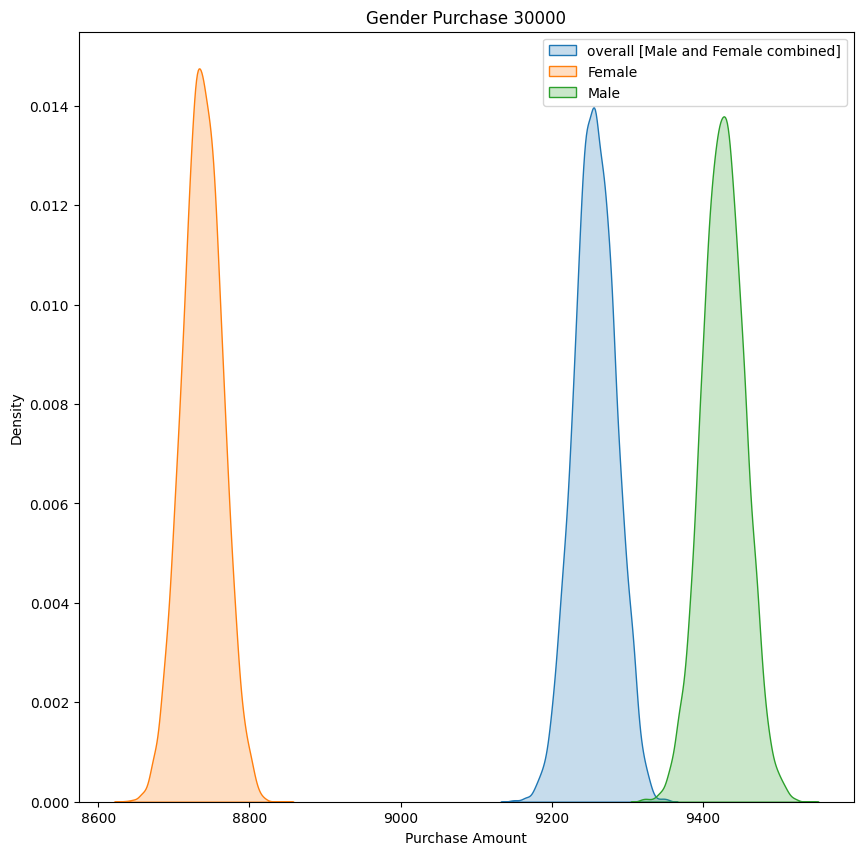

In [ ]:
df_gender_30000 = Central_Limit_Theorem_Plot(30000, 10000,female_all, male_all)

In [ ]:
df_gender_30000.head(10)

,Gender,C.I Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,iterations
0,Male,90%,9380.72,9473.66,92.94,28.249240,30000,10000
1,Female,90%,8693.07,8780.46,87.39,26.562310,30000,10000
2,Overall,90%,9210.95,9303.35,92.40,28.085106,30000,10000
3,Male,95%,9370.35,9482.37,112.02,28.576531,30000,10000
4,Female,95%,8684.94,8788.67,103.73,26.461735,30000,10000
5,Overall,95%,9202.34,9310.35,108.01,27.553571,30000,10000
6,Male,99%,9324.31,9501.87,177.56,34.477670,30000,10000
7,Female,99%,8649.56,8803.53,153.97,29.897087,30000,10000
8,Overall,99%,9161.33,9325.42,164.09,31.862136,30000,10000


#Observations:
#As sample size increases,  confidence interval becomes thinner and standard error are also reducing and we can clearly conclude that Male are spending more than females.

#5. How does Marital_Status affect the amount spent?¶

In [ ]:
walmart_single = walmart_df[walmart_df['Marital_Status']==0]
single_all = np.array(walmart_single['Purchase']).flatten()
walmart_married = walmart_df[walmart_df['Marital_Status']==1]
married_all = np.array(walmart_married['Purchase']).flatten()
overall = np.array(walmart_df['Purchase']).flatten()

In [ ]:
single_mean = round(np.mean(single_all),2)
single_std = round(np.std(single_all),2)
single_median = round(np.median(single_all),2)
single_var=round(np.var(single_all),2)
married_mean = round(np.mean(married_all),2)
married_std = round(np.std(married_all),2)
married_median = round(np.median(married_all),2)
married_var=round(np.var(married_all),2)
overall_mean = round(np.mean(overall),2)
overall_std = round(np.std(overall),2)
overall_median = round(np.median(overall),2)
overall_var=round(np.var(overall),2)

marital_analysis_df=pd.DataFrame([[single_mean, single_median, single_std, single_var,'single'],
              [married_mean, married_median, married_std, married_var,'married'],
            [overall_mean, overall_median, overall_std, overall_var,'overall']
                                ], columns=['mean','median','standard deviation','variance','hue'])
marital_analysis_df.head()

,mean,median,standard deviation,variance,hue
0,9258.82,8044.0,4864.57,23664080.02,single
1,9253.67,8051.0,4843.48,23459256.85,married
2,9256.71,8047.0,4855.94,23580180.01,overall


In [ ]:
def Central_Limit_Theorem_Marital_status(sample_size, iterations,single_all, married_all, overall):
    fig = plt.figure(figsize=(10,10))

    overall_sample_size = []
    for i in range(iterations):
        all_samples = np.random.choice(overall,sample_size )
        overall_sample_size.append(np.mean(all_samples))
    sns.kdeplot(data=overall_sample_size,label='overall [Married and Single combined]',fill=True)

    bootstraped_single=[]
    for i in range(iterations):
        single_samples = np.random.choice(single_all,sample_size )
        bootstraped_single.append(np.mean(single_samples))
    sns.kdeplot(data=bootstraped_single,label='Single',fill=True)

    bootstraped_married=[]
    for i in range(iterations):
        married_samples = np.random.choice(married_all,sample_size )
        bootstraped_married.append(np.mean(married_samples))
    sns.kdeplot(data=bootstraped_married,label='Married',fill=True)

    plt.legend()
    plt.xlabel("Purchase Amount")
    plt.title(f"Marital Status Purchase {sample_size}")

    single_90 = np.percentile(bootstraped_single, q=[5,95]).round(2)
    single_95 = np.percentile(bootstraped_single, q=[2.5,97.5]).round(2)
    single_99 = np.percentile(bootstraped_single, q=[0.05,99.5]).round(2)
    married_90 = np.percentile(bootstraped_married, q=[5,95]).round(2)
    married_95 = np.percentile(bootstraped_married, q=[2.5,97.5]).round(2)
    married_99 = np.percentile(bootstraped_married, q=[0.05,99.5]).round(2)
    overall_90 = np.percentile(overall_sample_size, q=[5,95]).round(2)
    overall_95 = np.percentile(overall_sample_size, q=[2.5,97.5]).round(2)
    overall_99 = np.percentile(overall_sample_size, q=[0.05,99.5]).round(2)
    single_std_err = round(single_std/((len(bootstraped_single)**0.5)),2)
    married_std_err = round(married_std/((len(bootstraped_married)**0.5)),2)
    oveall_std_err = round(overall_std/((len(overall_sample_size)**0.5)),2)

    arr = [['single','90%',single_90[0],single_90[1],single_90[1]-single_90[0],(single_90[1]-single_90[0])/(2*1.645), sample_size,iterations ],
          ['married','90%',married_90[0],married_90[1],married_90[1]-married_90[0],(married_90[1]-married_90[0])/(2*1.645), sample_size,iterations],
          ['Overall','90%',overall_90[0],overall_90[1],overall_90[1]-overall_90[0],(overall_90[1]-overall_90[0])/(2*1.645),sample_size,iterations],
           ['single','95%',single_95[0],single_95[1],single_95[1]-single_95[0],(single_95[1]-single_95[0])/(2*1.96),sample_size,iterations],
          ['married','95%',married_95[0],married_95[1],married_95[1]-married_95[0],(married_95[1]-married_95[0])/(2*1.96),sample_size,iterations],
          ['Overall','95%',overall_95[0],overall_95[1],overall_95[1]-overall_95[0],(overall_95[1]-overall_95[0])/(2*1.96),sample_size,iterations],
           ['single','99%',single_99[0],single_99[1],single_99[1]-single_99[0],(single_99[1]-single_99[0])/(2*2.575),sample_size,iterations],
          ['married','99%',married_99[0],married_99[1],married_99[1]-married_99[0],(married_99[1]-married_99[0])/(2*2.575),sample_size,iterations],
          ['Overall','99%',overall_99[0],overall_99[1],overall_99[1]-overall_99[0],(overall_99[1]-overall_99[0])/(2*2.575),sample_size,iterations]

          ]
    df = pd.DataFrame(data=arr,
    columns=['Marital_status','C.I Limit','Lower Limit','Upper Limit',
      'diff','std_error','sample_size','# iter'])

    plt.show()

    return df


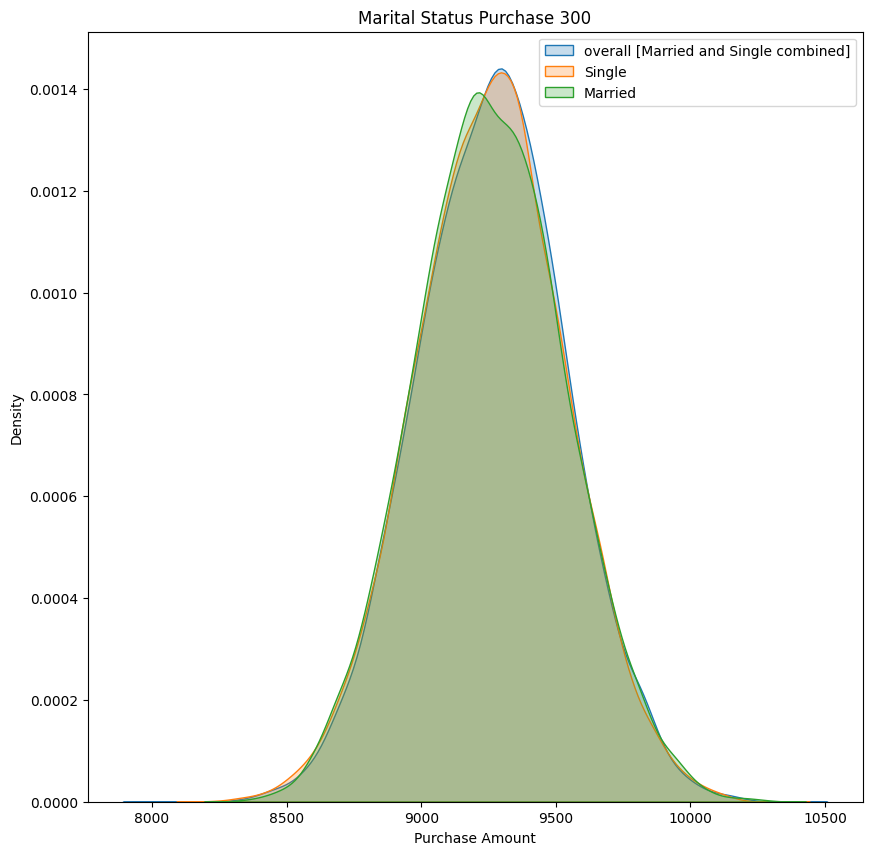

In [ ]:
df_Marital_300=Central_Limit_Theorem_Marital_status(300,10000, single_all, married_all, overall)

In [ ]:
df_Marital_300.head(10)

,Marital_status,C.I Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,# iter
0,single,90%,8792.58,9712.45,919.87,279.595745,300,10000
1,married,90%,8794.87,9723.15,928.28,282.151976,300,10000
2,Overall,90%,8805.69,9720.74,915.05,278.130699,300,10000
3,single,95%,8700.30,9805.53,1105.23,281.946429,300,10000
4,married,95%,8709.36,9816.30,1106.94,282.382653,300,10000
5,Overall,95%,8715.85,9813.19,1097.34,279.933673,300,10000
6,single,99%,8334.71,9972.16,1637.45,317.951456,300,10000
7,married,99%,8424.21,9978.56,1554.35,301.815534,300,10000
8,Overall,99%,8379.86,9979.43,1599.57,310.596117,300,10000


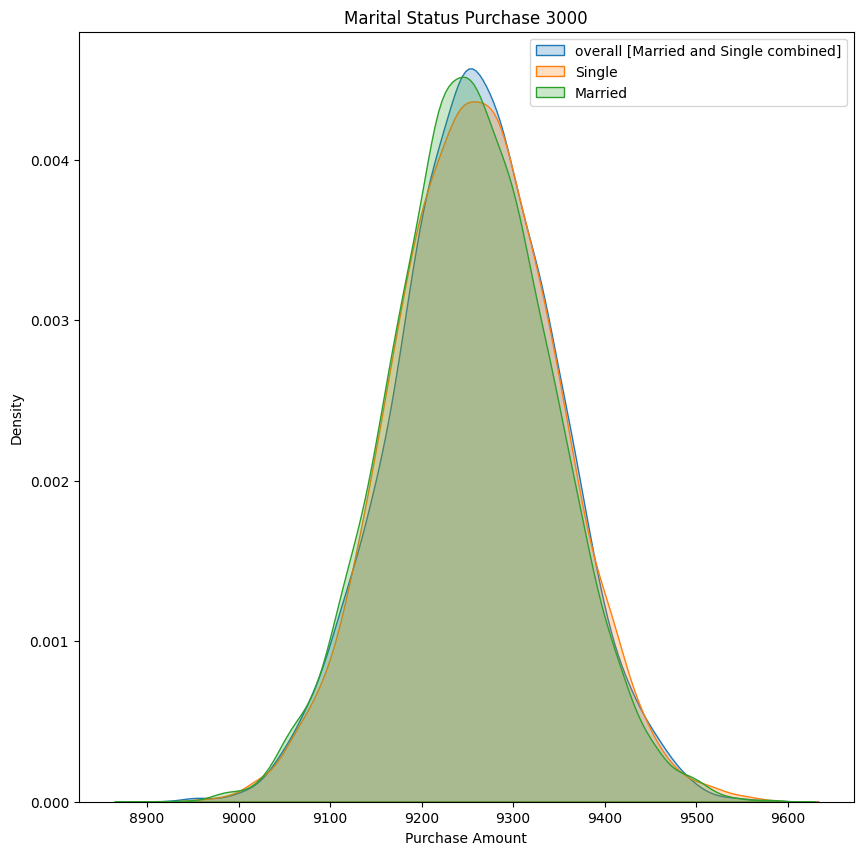

In [ ]:
df_Marital_3000=Central_Limit_Theorem_Marital_status(3000,10000, single_all, married_all, overall)

In [ ]:
df_Marital_3000.head(10)

,Marital_status,C.I Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,# iter
0,single,90%,9113.42,9406.38,292.96,89.045593,3000,10000
1,married,90%,9107.75,9399.74,291.99,88.750760,3000,10000
2,Overall,90%,9109.92,9401.91,291.99,88.750760,3000,10000
3,single,95%,9083.47,9434.13,350.66,89.454082,3000,10000
4,married,95%,9078.87,9428.40,349.53,89.165816,3000,10000
5,Overall,95%,9082.15,9431.97,349.82,89.239796,3000,10000
6,single,99%,8977.44,9498.42,520.98,101.161165,3000,10000
7,married,99%,8971.62,9491.74,520.12,100.994175,3000,10000
8,Overall,99%,8951.56,9482.07,530.51,103.011650,3000,10000


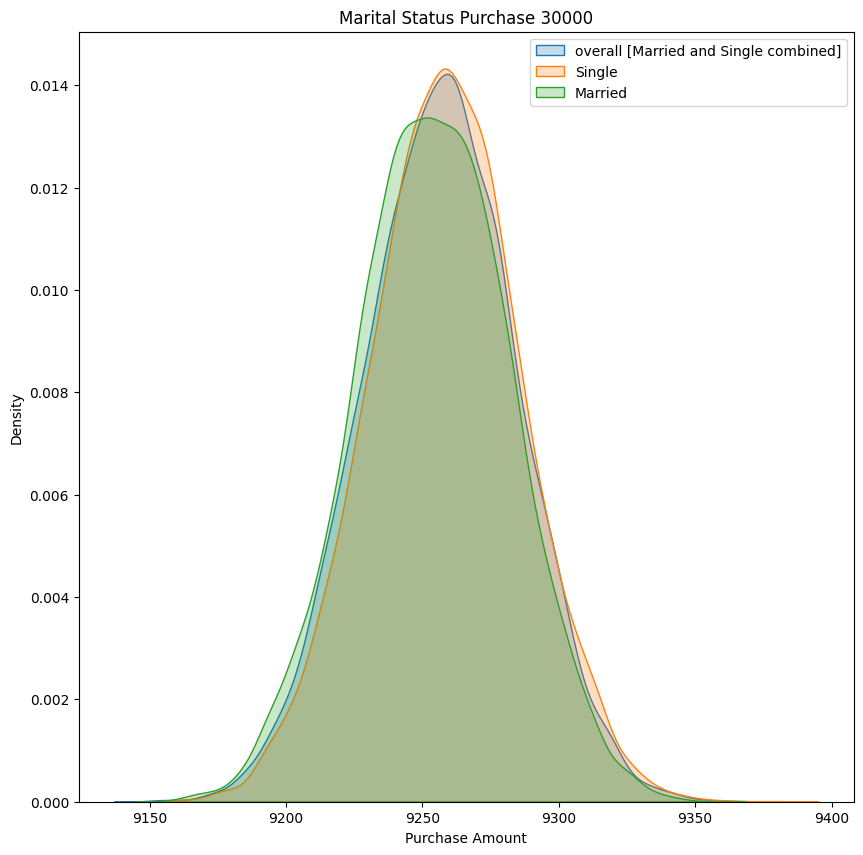

In [ ]:
df_Marital_30000=Central_Limit_Theorem_Marital_status(30000,10000, single_all, married_all, overall)

In [ ]:
df_Marital_30000.head(10)

,Marital_status,C.I Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,# iter
0,single,90%,9212.50,9304.80,92.30,28.054711,30000,10000
1,married,90%,9206.61,9299.98,93.37,28.379939,30000,10000
2,Overall,90%,9210.29,9302.16,91.87,27.924012,30000,10000
3,single,95%,9203.54,9313.51,109.97,28.053571,30000,10000
4,married,95%,9198.37,9308.55,110.18,28.107143,30000,10000
5,Overall,95%,9201.09,9311.19,110.10,28.086735,30000,10000
6,single,99%,9169.97,9331.03,161.06,31.273786,30000,10000
7,married,99%,9166.13,9324.92,158.79,30.833010,30000,10000
8,Overall,99%,9166.77,9328.13,161.36,31.332039,30000,10000


#Observations:
Confidence interval (CI) are narrow and they are overlapping
There is no significant difference in mean of Married or Single groups when sample size increases.

#7. How does Age affect the amount spent?

In [ ]:
age_list=list(walmart_df['Age'].unique())
age_list=sorted(age_list)
age_list

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
def age_analysis(walmart, age_list):
    age_groups=[]
    age_rows =[]
    for age in age_list:
        cur_age_grp = np.array(walmart[walmart['Age']==age]['Purchase']).flatten()
        age_groups.append((age, cur_age_grp ))
    age_groups.append(('overall',np.array(walmart['Purchase']).flatten()))
    #print(age_groups)
    for val in age_groups:
        age, age_grps = val
        row=[
                age,
                round(np.mean(age_grps),2),
                round(np.median(age_grps),2),
                round(np.std(age_grps),2),
                round(np.var(age_grps),2)

            ]
        age_rows.append(row)
    result_df=pd.DataFrame(age_rows, columns=['Age','mean','median','standard deviation','variance'])
    return result_df,age_groups

In [ ]:
result_df,age_groups = age_analysis(walmart_df, age_list)
result_df.head(10)

,Age,mean,median,standard deviation,variance
0,0-17,8940.65,7986.0,4940.43,24407884.92
1,18-25,9169.01,8027.0,4889.41,23906292.54
2,26-35,9243.78,8030.0,4855.18,23572782.52
3,36-45,9322.92,8061.0,4847.58,23498991.23
4,46-50,9204.21,8036.0,4785.89,22904741.13
5,51-55,9514.86,8130.0,4873.57,23751649.22
6,55+,9327.80,8105.5,4779.82,22846724.61
7,overall,9256.71,8047.0,4855.94,23580180.01


In [ ]:
def Central_Limit_Age_Status(sample_size, num_iterations,group_dict, result_df):
    fig = plt.figure(figsize=(15,10))
    bootstraped_list=[]
    for age_bins, groups in group_dict:
        all_samples=[]
        for i in range(num_iterations):
            samples = np.random.choice(groups,sample_size )
            all_samples.append(np.mean(samples))
        if age_bins == 'overall':
            label = f'overall Age group combined => sample_size {sample_size}'
        else:
            label = f'{age_bins} => sample_size {sample_size}'
        sns.kdeplot(data=all_samples,label=label,fill=True)
        bootstraped_list.append((age_bins, all_samples))

    plt.legend(loc="upper left")
    plt.title(f"Age Purchase {sample_size}")
    plt.xlabel("Purchase Amount")
    df_rows=[]
    for age_bins, bootstrapped_samples in bootstraped_list:
        age_90 = np.percentile(bootstrapped_samples, q=[5,95]).round(2)
        age_95 = np.percentile(bootstrapped_samples, q=[2.5,97.5]).round(2)
        age_99 = np.percentile(bootstrapped_samples, q=[0.05,99.5]).round(2)
        age_std = round(result_df[result_df['Age']==age_bins]['standard deviation'].iloc[0]/((len(bootstrapped_samples)**0.5)),2)
        df_rows.append([age_bins,'90 %',age_90[0],age_90[1],age_90[1]-age_90[0], (age_90[1]-age_90[0])/(2*1.645), sample_size, num_iterations])
        df_rows.append([age_bins,'95 %',age_95[0],age_95[1],age_95[1]-age_95[0], (age_95[1]-age_95[0])/(2*1.96), sample_size, num_iterations])
        df_rows.append([age_bins,'99 %',age_99[0],age_99[1],age_99[1]-age_99[0], (age_99[1]-age_99[0])/(2*2.575), sample_size, num_iterations])
    df = pd.DataFrame(data=df_rows,
            columns=['Age_Bins','Conf Limit','Lower Limit','Upper Limit',
          'diff','std_error','sample_size','num_iterations'])
    plt.show()
    return df

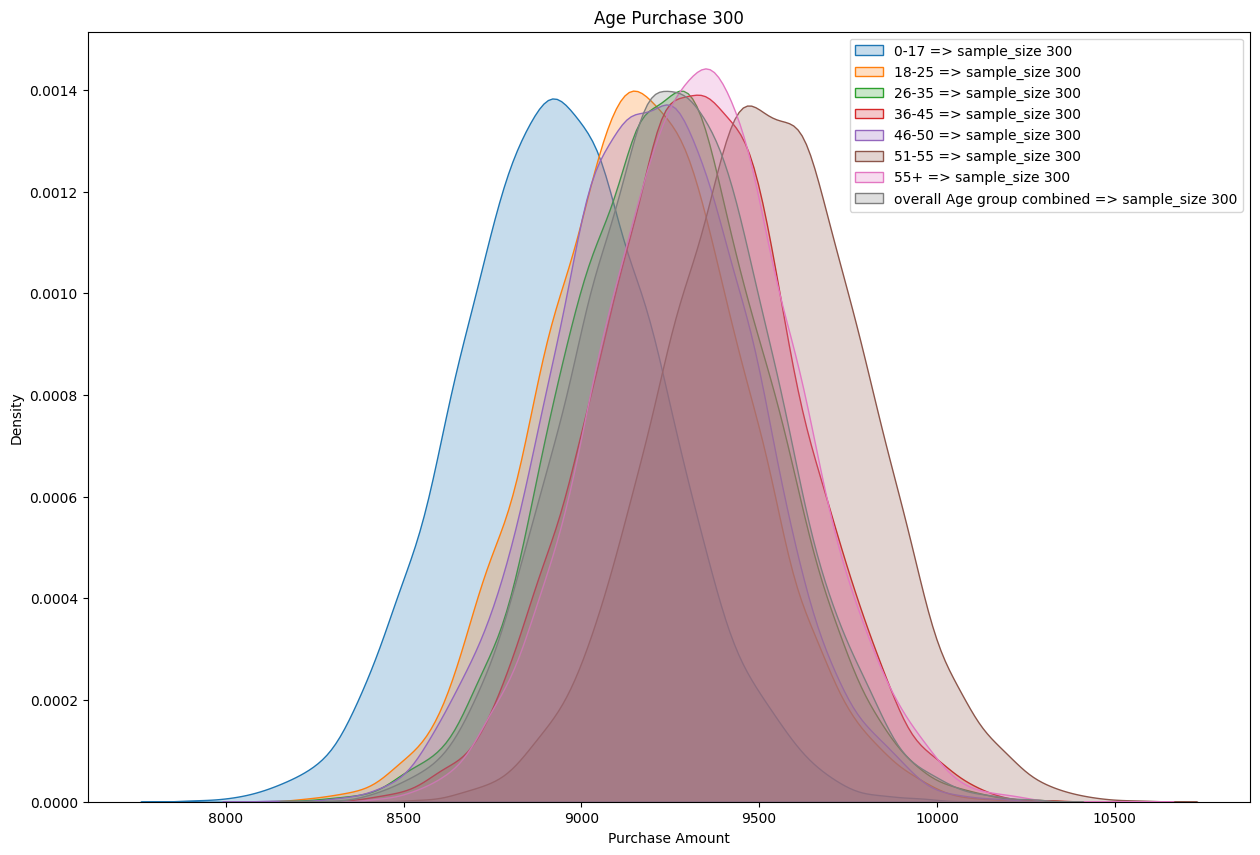

In [ ]:
age_df_300=Central_Limit_Age_Status(300,10000,age_groups,result_df )

In [ ]:
age_df_300.head(50)

,Age_Bins,Conf Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,num_iterations
0,0-17,90 %,8475.09,9414.33,939.24,285.483283,300,10000
1,0-17,95 %,8387.48,9516.14,1128.66,287.923469,300,10000
2,0-17,99 %,8015.70,9691.01,1675.31,325.302913,300,10000
3,18-25,90 %,8711.18,9645.22,934.04,283.902736,300,10000
4,18-25,95 %,8632.52,9743.83,1111.31,283.497449,300,10000
5,18-25,99 %,8261.79,9921.51,1659.72,322.275728,300,10000
6,26-35,90 %,8782.80,9707.33,924.53,281.012158,300,10000
7,26-35,95 %,8691.92,9802.19,1110.27,283.232143,300,10000
8,26-35,99 %,8301.98,9984.66,1682.68,326.733981,300,10000
9,36-45,90 %,8858.66,9782.83,924.17,280.902736,300,10000


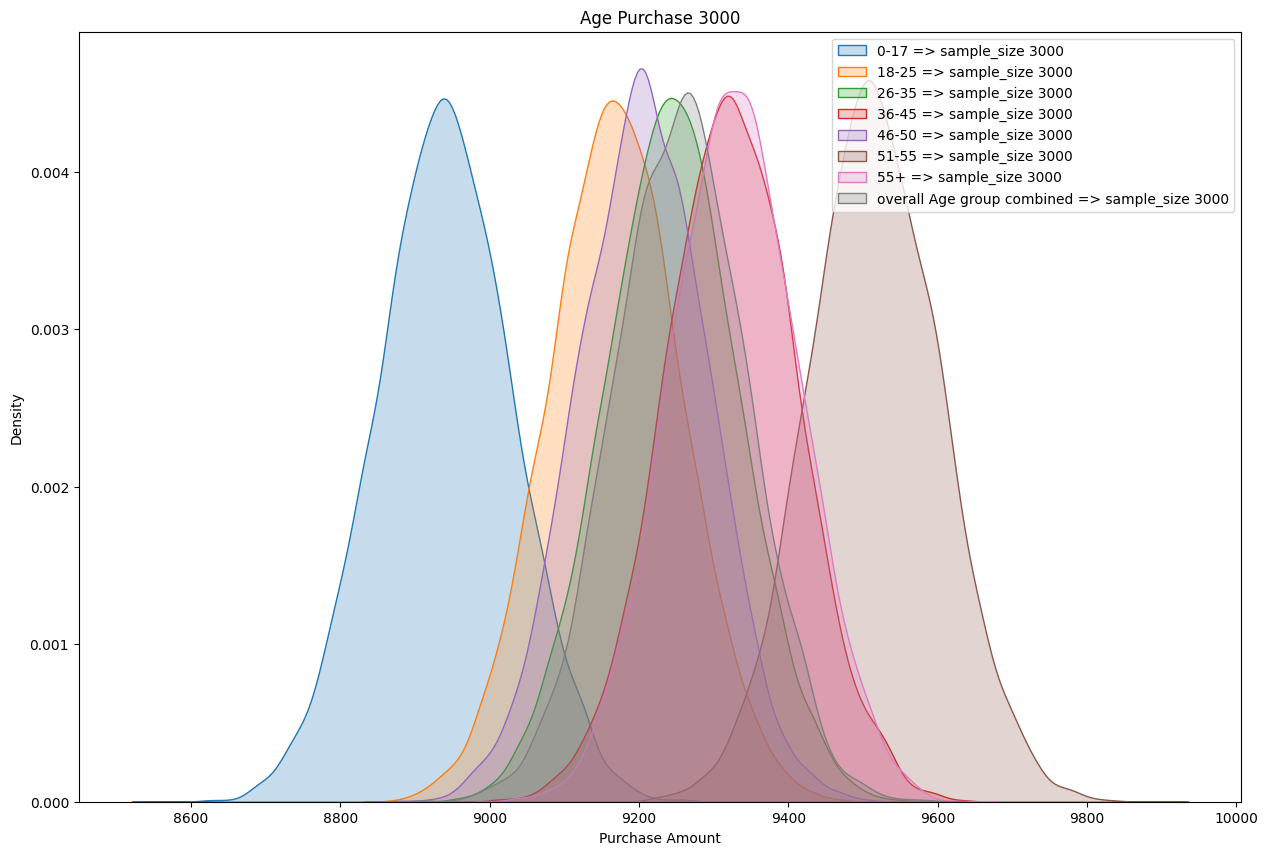

In [ ]:
age_df_3000=Central_Limit_Age_Status(3000,10000,age_groups,result_df )

In [ ]:
age_df_3000.head(50)

,Age_Bins,Conf Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,num_iterations
0,0-17,90 %,8790.47,9088.48,298.01,90.580547,3000,10000
1,0-17,95 %,8763.20,9116.35,353.15,90.089286,3000,10000
2,0-17,99 %,8651.33,9167.25,515.92,100.178641,3000,10000
3,18-25,90 %,9021.62,9315.96,294.34,89.465046,3000,10000
4,18-25,95 %,8994.19,9345.49,351.30,89.617347,3000,10000
5,18-25,99 %,8897.63,9395.25,497.62,96.625243,3000,10000
6,26-35,90 %,9094.70,9391.60,296.90,90.243161,3000,10000
7,26-35,95 %,9069.83,9421.26,351.43,89.650510,3000,10000
8,26-35,99 %,8961.93,9470.82,508.89,98.813592,3000,10000
9,36-45,90 %,9178.03,9469.68,291.65,88.647416,3000,10000


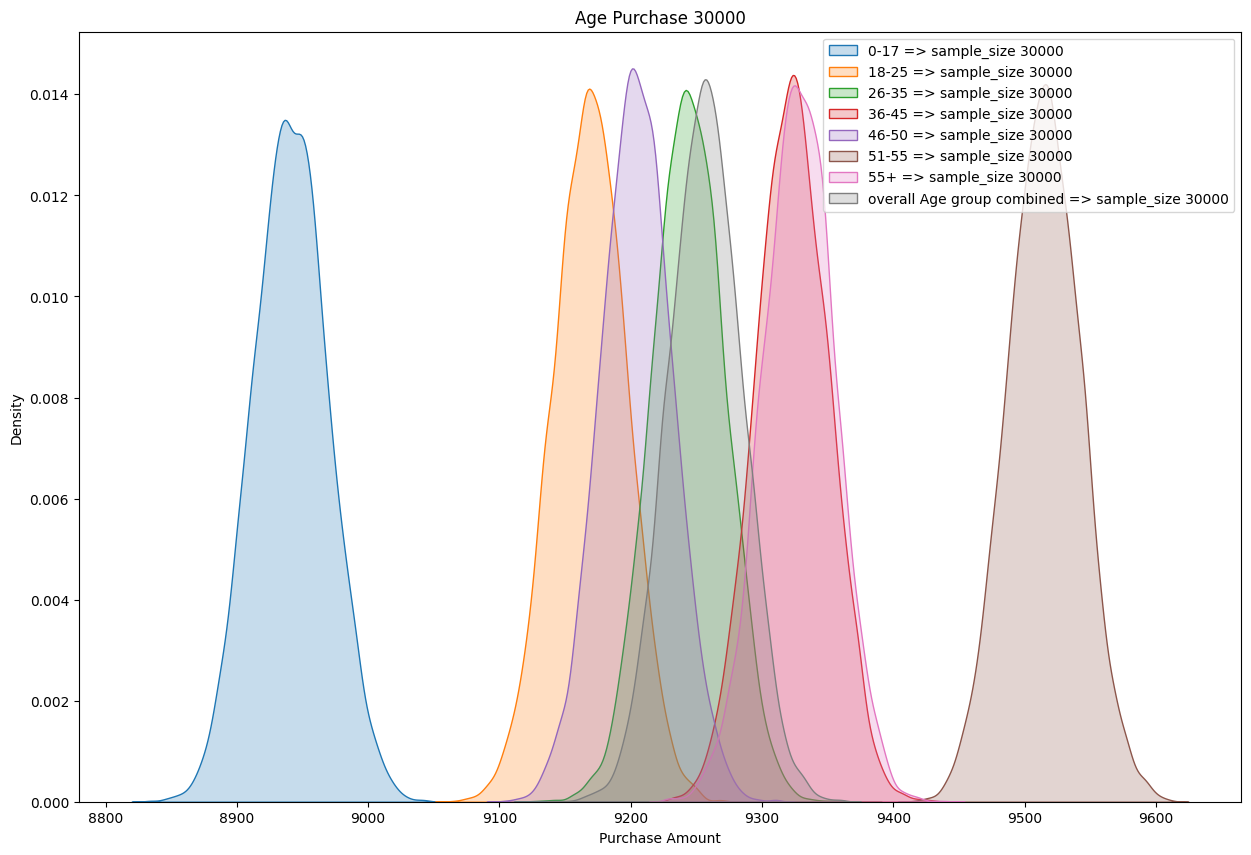

In [ ]:
age_df_30000=Central_Limit_Age_Status(30000,10000,age_groups,result_df )

In [ ]:
age_df_30000.head(25)

,Age_Bins,Conf Limit,Lower Limit,Upper Limit,diff,std_error,sample_size,num_iterations
0,0-17,90 %,8894.14,8988.67,94.53,28.732523,30000,10000
1,0-17,95 %,8885.82,8997.37,111.55,28.456633,30000,10000
2,0-17,99 %,8847.31,9014.28,166.97,32.421359,30000,10000
3,18-25,90 %,9122.51,9214.47,91.96,27.951368,30000,10000
4,18-25,95 %,9113.63,9222.43,108.80,27.755102,30000,10000
5,18-25,99 %,9076.87,9240.70,163.83,31.811650,30000,10000
6,26-35,90 %,9197.86,9289.62,91.76,27.890578,30000,10000
7,26-35,95 %,9189.55,9298.18,108.63,27.711735,30000,10000
8,26-35,99 %,9143.20,9315.43,172.23,33.442718,30000,10000
9,36-45,90 %,9277.17,9368.93,91.76,27.890578,30000,10000


#Observations:
As Sample Size increases Confidence Interval (CI) is becoming thinner.
Age Groups(0-17) purchase distribution is lesser than other age groups
Confidence interval overlaps, as the sample size increases mean distribution is thin.

#Insights and Recommendation
As sample size increases, standard deviation of sample means becomes smaller.

#Age and Purchase
As the sample size decreases, confidence intervals (CI) are overlapping for female and male customers, but if sample size increases we can see clear distinction in avg spending of male and female customers.
Males are spending more than Female

#Marital Status and Purchase
There is no significant difference in avg spending b/w single and married users
#Age Groups and Purchase


*   Age Groups 0-17 users are spending least purchases on an avg
*   Age group 51-55 users are spending highest purchases on an avg


#Recommendations:
As there is significant deviation between C.I of Female and Male customers, so business should focus on Products targetting gender based customization to improve business especially females.


*  Age Groups(0-17) are purchasing power is less,so they should focus on strategy to come up with more products to boost sales among age(0-17)
*   Age Groups(55+) spending most purchase so they can be given more promotion, walmart should try to retain those customers spending more.

